# Reducing hospital readmissions

## 📖 Background
You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

## Install and load some of the packages

In [52]:
install.packages("tidyverse")
library(tidyverse)
library(dplyr)
install.packages("broom")
library(broom)
library(tidyr)

Installing tidyverse [2.0.0] ...
	OK [linked cache]
Installing broom [1.0.3] ...
	OK [linked cache]


## 💾 The data and the columns. 
You have access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

#### Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

In [53]:
suppressPackageStartupMessages(library(tidyverse))
readmissions <- readr::read_csv('data/hospital_readmissions.csv', show_col_types = FALSE)
readmissions

age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
[40-50),2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes
[50-60),4,44,2,21,0,0,0,Missing,Injury,Other,Other,no,normal,yes,yes,no
[60-70),1,19,6,16,0,0,1,Other,Circulatory,Other,Other,no,no,no,yes,yes
[80-90),4,67,3,13,0,0,0,InternalMedicine,Digestive,Other,Other,no,no,no,no,yes


## What Questions are we trying to answer?

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

Let us get to it.

## Inspect the data to see that the class of each column

In [54]:
str(readmissions)
summary(readmissions)

spc_tbl_ [25,000 × 17] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age              : chr [1:25000] "[70-80)" "[70-80)" "[50-60)" "[70-80)" ...
 $ time_in_hospital : num [1:25000] 8 3 5 2 1 2 4 1 4 8 ...
 $ n_lab_procedures : num [1:25000] 72 34 45 36 42 51 44 19 67 37 ...
 $ n_procedures     : num [1:25000] 1 2 0 0 0 0 2 6 3 1 ...
 $ n_medications    : num [1:25000] 18 13 18 12 7 10 21 16 13 18 ...
 $ n_outpatient     : num [1:25000] 2 0 0 1 0 0 0 0 0 0 ...
 $ n_inpatient      : num [1:25000] 0 0 0 0 0 0 0 0 0 0 ...
 $ n_emergency      : num [1:25000] 0 0 0 0 0 0 0 1 0 0 ...
 $ medical_specialty: chr [1:25000] "Missing" "Other" "Missing" "Missing" ...
 $ diag_1           : chr [1:25000] "Circulatory" "Other" "Circulatory" "Circulatory" ...
 $ diag_2           : chr [1:25000] "Respiratory" "Other" "Circulatory" "Other" ...
 $ diag_3           : chr [1:25000] "Other" "Other" "Circulatory" "Diabetes" ...
 $ glucose_test     : chr [1:25000] "no" "no" "no" "no" ...
 $ A1Ctest          : chr

     age            time_in_hospital n_lab_procedures  n_procedures  
 Length:25000       Min.   : 1.000   Min.   :  1.00   Min.   :0.000  
 Class :character   1st Qu.: 2.000   1st Qu.: 31.00   1st Qu.:0.000  
 Mode  :character   Median : 4.000   Median : 44.00   Median :1.000  
                    Mean   : 4.453   Mean   : 43.24   Mean   :1.352  
                    3rd Qu.: 6.000   3rd Qu.: 57.00   3rd Qu.:2.000  
                    Max.   :14.000   Max.   :113.00   Max.   :6.000  
 n_medications    n_outpatient      n_inpatient      n_emergency     
 Min.   : 1.00   Min.   : 0.0000   Min.   : 0.000   Min.   : 0.0000  
 1st Qu.:11.00   1st Qu.: 0.0000   1st Qu.: 0.000   1st Qu.: 0.0000  
 Median :15.00   Median : 0.0000   Median : 0.000   Median : 0.0000  
 Mean   :16.25   Mean   : 0.3664   Mean   : 0.616   Mean   : 0.1866  
 3rd Qu.:20.00   3rd Qu.: 0.0000   3rd Qu.: 1.000   3rd Qu.: 0.0000  
 Max.   :79.00   Max.   :33.0000   Max.   :15.000   Max.   :64.0000  
 medical_specialty  

### Converting Categorical columns to Factors

For now everything looks good but I want to convert all categorical columns to factors. We do that and inspect the data again.

In [55]:
readmissions$age <- as.factor(readmissions$age)
readmissions$medical_specialty <- as.factor(readmissions$medical_specialty)
readmissions$diag_1 <- as.factor(readmissions$diag_1)
readmissions$diag_2 <- as.factor(readmissions$diag_2)
readmissions$diag_3 <- as.factor(readmissions$diag_3)
readmissions$glucose_test <- as.factor(readmissions$glucose_test)
readmissions$A1Ctest <- as.factor(readmissions$A1Ctest)
readmissions$change <- as.factor(readmissions$change)
readmissions$diabetes_med <- as.factor(readmissions$diabetes_med)
readmissions$readmitted <- as.factor(readmissions$readmitted)

summary(readmissions)

       age       time_in_hospital n_lab_procedures  n_procedures  
 [40-50) :2532   Min.   : 1.000   Min.   :  1.00   Min.   :0.000  
 [50-60) :4452   1st Qu.: 2.000   1st Qu.: 31.00   1st Qu.:0.000  
 [60-70) :5913   Median : 4.000   Median : 44.00   Median :1.000  
 [70-80) :6837   Mean   : 4.453   Mean   : 43.24   Mean   :1.352  
 [80-90) :4516   3rd Qu.: 6.000   3rd Qu.: 57.00   3rd Qu.:2.000  
 [90-100): 750   Max.   :14.000   Max.   :113.00   Max.   :6.000  
                                                                  
 n_medications    n_outpatient      n_inpatient      n_emergency     
 Min.   : 1.00   Min.   : 0.0000   Min.   : 0.000   Min.   : 0.0000  
 1st Qu.:11.00   1st Qu.: 0.0000   1st Qu.: 0.000   1st Qu.: 0.0000  
 Median :15.00   Median : 0.0000   Median : 0.000   Median : 0.0000  
 Mean   :16.25   Mean   : 0.3664   Mean   : 0.616   Mean   : 0.1866  
 3rd Qu.:20.00   3rd Qu.: 0.0000   3rd Qu.: 1.000   3rd Qu.: 0.0000  
 Max.   :79.00   Max.   :33.0000   Max.   :1

## 1. What is the most common primary diagnosis by age group?

Using the column "diag_1", I want to compare the frequency of each diagnosis across the different age groups. By arranging it in order from highest to lowest and selecting the top 3, I will be able to see the most common diagnosis across age groups.

In [56]:
#arranging the dataset and adding a percentage column
diagnosis_by_age_group <- readmissions %>%
  group_by(age, diag_1) %>%
  summarise(
    count_of_diag = n()
  ) %>%
  mutate(
    Percentage=paste0(round(count_of_diag/sum(count_of_diag)*100,2),"%")
  )
diagnosis_by_age_group

`summarise()` has grouped output by 'age'. You can override using the `.groups`
argument.
New names:
• `` -> `...1`


age,diag_1,count_of_diag,Percentage
<fct>,<fct>,<int>,<chr>
[40-50),Circulatory,504,19.91%
[40-50),Diabetes,369,14.57%
[40-50),Digestive,271,10.7%
[40-50),Injury,162,6.4%
[40-50),Musculoskeletal,100,3.95%
[40-50),Other,750,29.62%
[40-50),Respiratory,376,14.85%
[50-60),Circulatory,1256,28.21%
[50-60),Diabetes,393,8.83%


Here, we see the count of the first diagnosis by age group. We also see the proportion calculated for each age group.

In [57]:
#then we pick the top 3 to find the 3 most common diagnosis for each age group
diagnosis_by_age_groups <- diagnosis_by_age_group %>%                                     
  arrange(desc(count_of_diag)) %>% 
  group_by(age) %>%
  slice(1:3)
diagnosis_by_age_groups

New names:
• `` -> `...1`


age,diag_1,count_of_diag,Percentage
<fct>,<fct>,<int>,<chr>
[40-50),Other,750,29.62%
[40-50),Circulatory,504,19.91%
[40-50),Respiratory,376,14.85%
[50-60),Circulatory,1256,28.21%
[50-60),Other,1164,26.15%
[50-60),Respiratory,694,15.59%
[60-70),Circulatory,1962,33.18%
[60-70),Other,1402,23.71%
[60-70),Respiratory,836,14.14%


I added this line of code to help select the top 3 Primary diagnosis by age group. The most common diagnosis across all age groups are Circulatory and Respiratory diagnosis.

## 2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates.

This question requires me to check if the doctors assumption that diabetes plays a central role in readmission is true. I will be running a hypothesis test to see if there is a relationship between a diabetes diagnosis and readmission rates. 

Since the variables I am going to be comparing are categorical variables, the test I will be using will be a chi-square test for independence. Also, there are 3 diagnosis columns, so I will be conducting 3 seperate test to determine which of them has a significant effect on readmission rates.

Let's start by definig our **hypotheses:**
- **Null hypothesis (H0): There is no relationship between diabetes diagnosis and the readmission rates.**
- **Alternative hypothesis (Ha): There is a significant relationship between diabetes diagnosis and the readmission rates.**

Now, that we have defined the hypotheses, I will be converting the "diag_1", "diag_2", "diag_3" columns to have "Diabetes" and "Not diabetes". I am doing this so I don't confuse myself later. I will also make the "readmitted" column a factor so it doesn't count like a number.

Lastly, let's set a significance level of 5%. 
- If the p-value is < or = the significance level, we reject the null hypothesis and adopt the alternative hypothesis;
- If the p-value is > the significance level, we retain the null hypothesis.

Let's begin ~

### The first diaabetes diagnosis vs. readmission rates

In [58]:
#create a new_df for the dataset to visualize it
#recode the diabetes vallues to "diabetes and not diabetes" and make the readmitted column a factor
readmissions$diag_1 <- ifelse(readmissions$diag_1 == "Diabetes", "Diabetes", "Not Diabetes")
readmissions$readmitted <- as.factor(readmissions$readmitted)

diabetes1 <- readmissions %>% 
  group_by(diag_1, readmitted) %>% 
  summarize(Freq = n()) %>% 
  mutate(Prop = Freq/sum(Freq)) %>% 
  arrange(Prop)
diabetes1


`summarise()` has grouped output by 'diag_1'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


diag_1,readmitted,Freq,Prop
<chr>,<fct>,<int>,<dbl>
Diabetes,no,810,0.4636520
Not Diabetes,yes,10817,0.4651873
Not Diabetes,no,12436,0.5348127
Diabetes,yes,937,0.5363480


Here, we see that the readmissions rate for those who have diabetes is 54% and the rate of those without diabetes is 46%. This could be an indication of a relationship between diabetes diagnosis 1 and readmission rates. But we can't be sure until we run a hypothesis test.

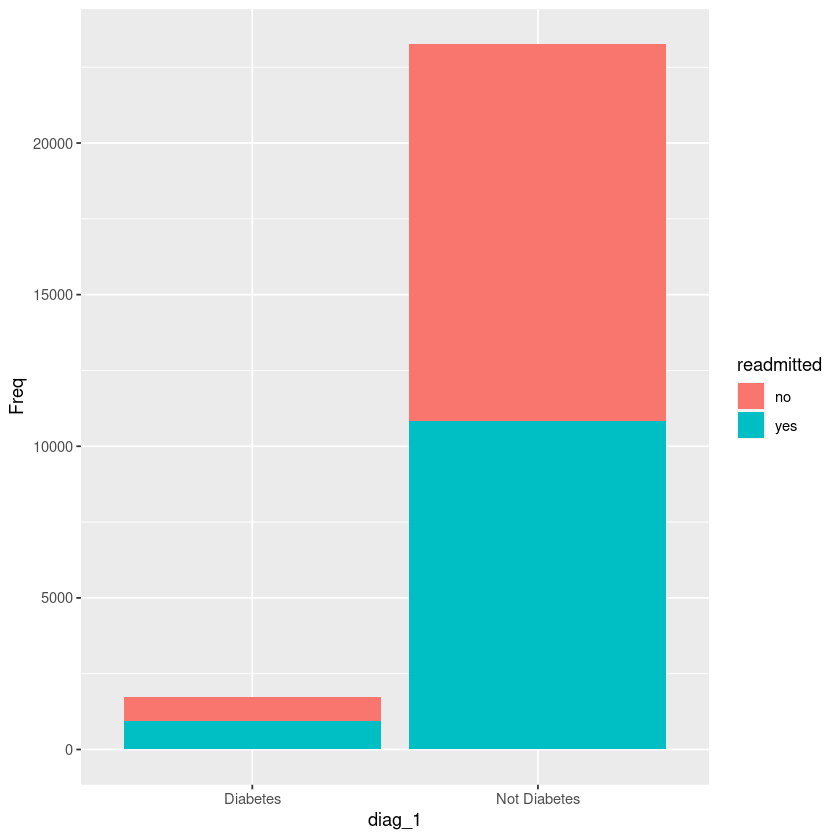

In [59]:
# Plot diad_1_diabetes filled by readmissions
ggplot(diabetes1, aes(diag_1, Freq, fill = readmitted))+
  geom_col() 

In [66]:
# Perform a chi-square test of independence
library(infer)
table(readmissions$diag_1, readmissions$readmitted)
test_results1 <- readmissions %>% 
  chisq_test(readmitted ~ diag_1)
test_results1

              
                  no   yes
  Diabetes       810   937
  Not Diabetes 12436 10817

statistic,chisq_df,p_value
<dbl>,<int>,<dbl>
32.746,1,1.050219e-08


From the test, we look at the p-value. The p-value is so little and so we have to reject the null hypothesis and take on the alternative hypothesis. In this case, we can come to a conclusion that there is indeed a statistically significant relationship between diabetes diagnosis 1 and readmissions.

I want to see if it's the same for the second and third diagnoses too, so I will run the hypothesis test for them.

### The second diaabetes diagnosis vs. readmission rates

In [61]:
#create a new_df for the dataset to visualize it
#recode the diabetes vallues to "diabetes and not diabetes" and make the readmitted column a factor
readmissions$diag_2 <- ifelse(readmissions$diag_2 == "Diabetes", "Diabetes", "Not Diabetes")
readmissions$readmitted <- as.factor(readmissions$readmitted)

diabetes2 <- readmissions %>% 
  group_by(diag_2, readmitted) %>% 
  summarize(Freq = n()) %>% 
  mutate(Prop = Freq/sum(Freq)) %>% 
  arrange(Prop)
diabetes2

`summarise()` has grouped output by 'diag_2'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


diag_2,readmitted,Freq,Prop
<chr>,<fct>,<int>,<dbl>
Diabetes,yes,1283,0.4415003
Not Diabetes,yes,10471,0.4739296
Not Diabetes,no,11623,0.5260704
Diabetes,no,1623,0.5584997


Here, we see that the readmissions rate for those who have diabetes is 44% and the rate of those without diabetes is 47%. This could be an indication of a relationship between diabetes diagnosis 2 and readmission rates or not. But we can't be sure until we run a hypothesis test.

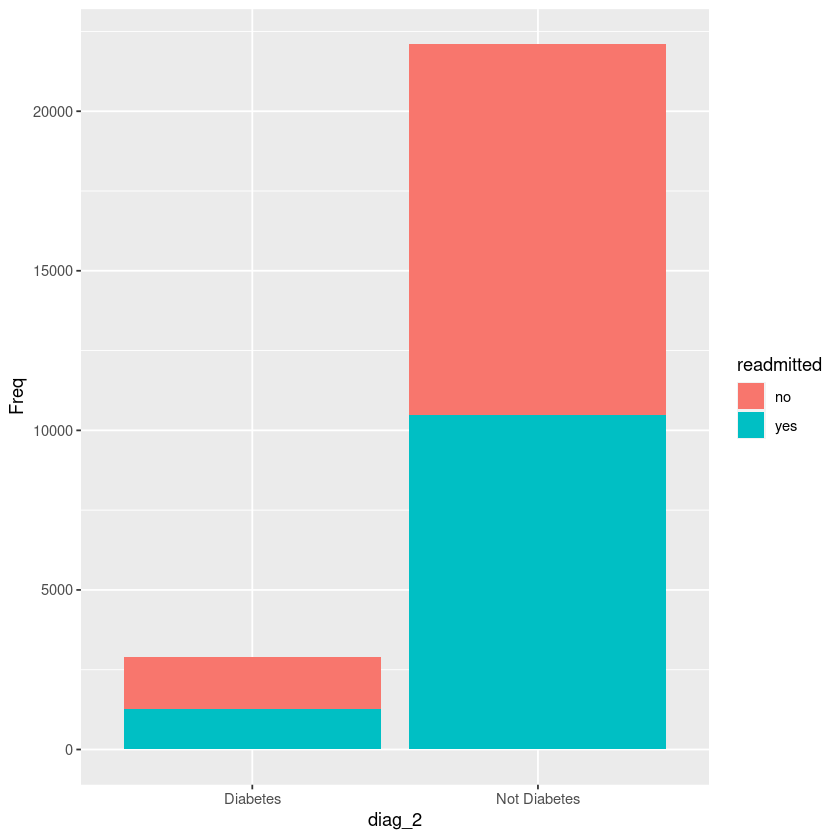

In [62]:
# Plot diad_2_diabetes filled by readmissions
ggplot(diabetes2, aes(diag_2, Freq, fill = readmitted))+
  geom_col() 

In [67]:
# Perform a chi-square test of independence
table(readmissions$diag_2, readmissions$readmitted)
test_results2 <- readmissions %>% 
  chisq_test(readmitted ~ diag_2)
test_results2

              
                  no   yes
  Diabetes      1623  1283
  Not Diabetes 11623 10471

statistic,chisq_df,p_value
<dbl>,<int>,<dbl>
10.71229,1,0.001064259


From the test, we look at the p-value. The p-value is little(that is, less than 5%) and so we have to reject the null hypothesis and take on the alternative hypothesis. In this case, we can come to a conclusion that there is indeed a statistically significant relationship between diabetes diagnosis 2 and readmissions.

### The third diaabetes diagnosis vs. readmission rates

In [64]:
#create a new_df for the dataset to visualize it
#recode the diabetes vallues to "diabetes and not diabetes" and make the readmitted column a factor
readmissions$diag_3 <- ifelse(readmissions$diag_3 == "Diabetes", "Diabetes", "Not Diabetes")
readmissions$readmitted <- as.factor(readmissions$readmitted)

diabetes3 <- readmissions %>% 
  group_by(diag_3, readmitted) %>% 
  summarize(Freq = n()) %>% 
  mutate(Prop = Freq/sum(Freq)) %>% 
  arrange(Prop)
diabetes3


`summarise()` has grouped output by 'diag_3'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


diag_3,readmitted,Freq,Prop
<chr>,<fct>,<int>,<dbl>
Diabetes,yes,1947,0.4569350
Not Diabetes,yes,9807,0.4728772
Not Diabetes,no,10932,0.5271228
Diabetes,no,2314,0.5430650


Here, we see that the readmissions rate for those who have diabetes is 46% and the rate of those without diabetes is 47%. This could be an indication of a relationship between diabetes diagnosis 3 and readmission rates or not. But we can't be sure until we run a hypothesis test.

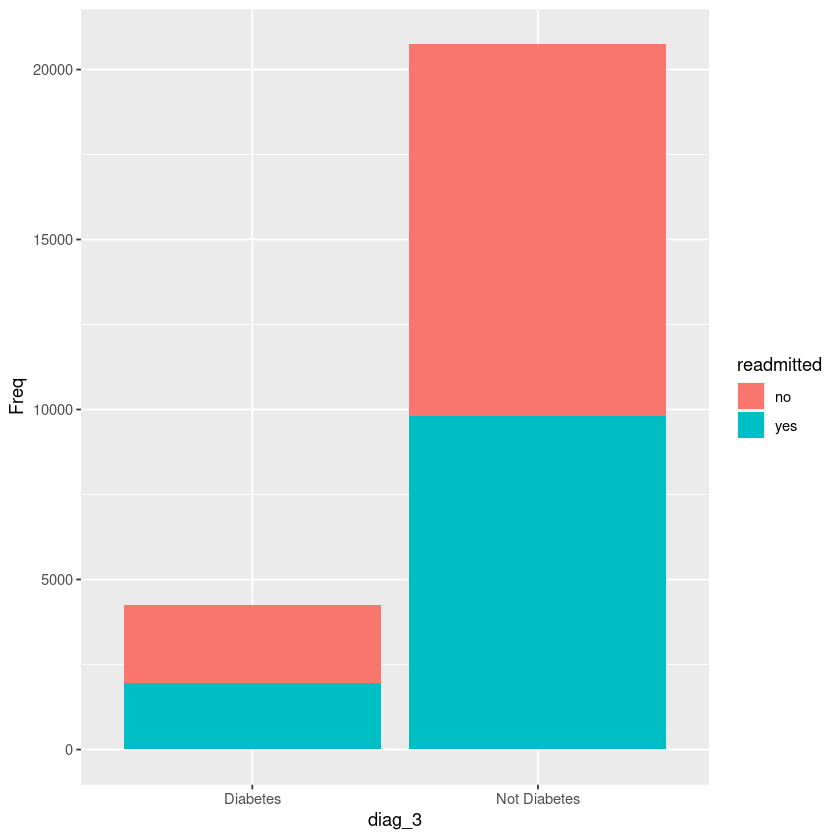

In [68]:
# Plot diag_3_diabetes filled by readmissions
ggplot(diabetes3, aes(diag_3, Freq, fill = readmitted))+
  geom_col() 

In [69]:
# Perform a chi-square test of independence
table(readmissions$diag_3, readmissions$readmitted)
test_results3 <- readmissions %>% 
  chisq_test(readmitted ~ diag_3)
test_results3

              
                  no   yes
  Diabetes      2314  1947
  Not Diabetes 10932  9807

statistic,chisq_df,p_value
<dbl>,<int>,<dbl>
3.542615,1,0.05981109


From the test, we look at the p-value. The p-value is greater than the significance level (that is, greater than 5%) and so we fail to reject the null hypothesis. In this case, we can come to a conclusion that there is no statistically significant relationship between diabetes diagnosis 3 and readmissions. 

## 3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

This is a very interesting question that lets us see what factors can affect the probability of readmissions.
For this question, I will be answering it using regression analysis. Additionally, since the variable we want to predict has "yes" and "no" values, we will be using logistic regression analysis in this case.

Let's go there ~ 

In [70]:
#installing the packages to convert the categorical variables to dummy variables
install.packages("fastDummies")
library(fastDummies)

Installing fastDummies [1.6.3] ...
	OK [linked cache]


In [81]:
#reload the original data 
readmissions <- readr::read_csv('data/hospital_readmissions.csv', show_col_types = FALSE)
#then make the categorical variables into dummies and remove the first dummy
readmissions_dummy <- dummy_cols(readmissions, remove_first_dummy = TRUE)
readmissions_new <- readmissions_dummy[, -9:-23]
head(readmissions_new)

age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,⋯,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,glucose_test_no,glucose_test_normal,A1Ctest_no,A1Ctest_normal,change_yes,diabetes_med_yes,readmitted_yes
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
[70-80),8,72,1,18,2,0,0,0,0,⋯,0,1,0,1,0,1,0,0,1,0
[70-80),3,34,2,13,0,0,0,0,0,⋯,0,1,0,1,0,1,0,0,1,0
[50-60),5,45,0,18,0,0,0,0,0,⋯,0,0,0,1,0,1,0,1,1,1
[70-80),2,36,0,12,1,0,0,0,0,⋯,0,0,0,1,0,1,0,1,1,1
[60-70),1,42,0,7,0,0,0,0,1,⋯,0,0,1,1,0,1,0,0,1,0
[40-50),2,51,0,10,0,0,0,0,0,⋯,0,1,0,1,0,1,0,0,0,1


In [72]:
#inspect the new dataframe with dummy variables
dim(readmissions_new)
str(readmissions_new)

[1] 25000    23

tibble [25,000 × 23] (S3: tbl_df/tbl/data.frame)
 $ age                                     : Factor w/ 6 levels "[40-50)","[50-60)",..: 4 4 2 4 3 1 2 3 5 4 ...
 $ time_in_hospital                        : num [1:25000] 8 3 5 2 1 2 4 1 4 8 ...
 $ n_lab_procedures                        : num [1:25000] 72 34 45 36 42 51 44 19 67 37 ...
 $ n_procedures                            : num [1:25000] 1 2 0 0 0 0 2 6 3 1 ...
 $ n_medications                           : num [1:25000] 18 13 18 12 7 10 21 16 13 18 ...
 $ n_outpatient                            : num [1:25000] 2 0 0 1 0 0 0 0 0 0 ...
 $ n_inpatient                             : num [1:25000] 0 0 0 0 0 0 0 0 0 0 ...
 $ n_emergency                             : num [1:25000] 0 0 0 0 0 0 0 1 0 0 ...
 $ medical_specialty_Family/GeneralPractice: int [1:25000] 0 0 0 0 0 0 0 0 0 1 ...
 $ medical_specialty_InternalMedicine      : int [1:25000] 0 0 0 0 1 0 0 0 1 0 ...
 $ medical_specialty_Missing               : int [1:25000] 1 0 1 1 0 1 1 

### Do some Pre-Model EDA

In [82]:
#examine the n_procedures by age_group
readmissions_new %>% 
  group_by(age) %>%
  summarize(
    mean = mean(n_procedures),
    var = var(n_procedures),
    median = median(n_procedures))

age,mean,var,median
<chr>,<dbl>,<dbl>,<dbl>
[40-50),1.2985782,2.840093,1
[50-60),1.5188679,3.291713,1
[60-70),1.5996956,3.294905,1
[70-80),1.3760421,2.959654,1
[80-90),0.9694420,2.108036,0
[90-100),0.6853333,1.310733,0


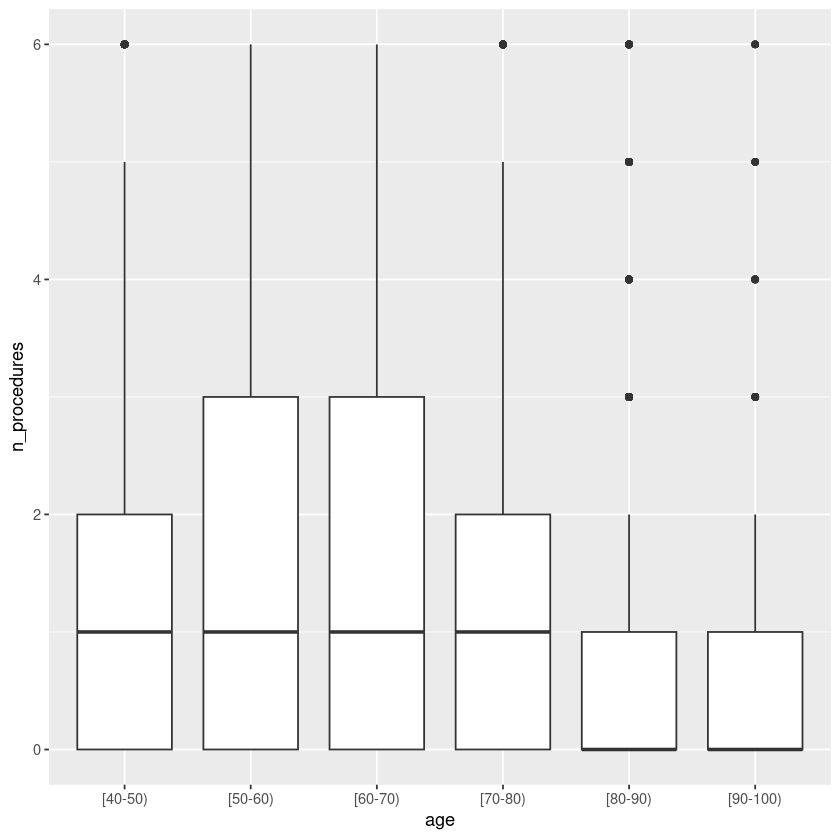

In [74]:
#try to visualize the number of procedures on a boxplot
ggplot(readmissions_new, aes(x = age, y = n_procedures)) + 
  geom_boxplot()

### What is the boxplot telling me?

About 50% of the population in the dataframe fall in the boundary of the box, while about 25% extend to the end of the line. All the extra dots we see in the graph are the outliers and we should watch out for this. The line in the middle of the box shows the median value. 

For most age groups, the median number of procedures is 1. From the plot, we cannot really see the mean because the mean is shown on a boxplot with dotted lines.

### On to modelling

Next, we go on and make a model. In this case, I am really just looking for a model that best fits the data, so I will be using Stepwise method of logistic regression. Usually, statisticians do not like this method when testing theories but i read somewhere that it finds variables that just make the model a good fit and eliminates variables that are not beneficial to the model. Of course, it just depends on the method yu chose to use, there is the backward elimination, forward selection and both-sided method of stepwise regression.

To answer my question, I will be using backward elimination method.


In [83]:
#to make our model, I will be using the stepwise method of letting R decide which variable is beneficial to the model
mdl_all <- glm(readmitted_yes ~., data = readmissions_new, family = binomial)
summary(mdl_all)


Call:
glm(formula = readmitted_yes ~ ., family = binomial, data = readmissions_new)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8468  -1.0521  -0.8498   1.2098   1.7790  

Coefficients:
                                             Estimate Std. Error z value
(Intercept)                                -0.6730856  0.1184700  -5.681
age[50-60)                                  0.0279811  0.0528259   0.530
age[60-70)                                  0.1375648  0.0508487   2.705
age[70-80)                                  0.2085848  0.0501657   4.158
age[80-90)                                  0.2148115  0.0537262   3.998
age[90-100)                                -0.0667953  0.0884290  -0.755
time_in_hospital                            0.0191293  0.0052227   3.663
n_lab_procedures                            0.0016753  0.0007698   2.176
n_procedures                               -0.0426376  0.0089325  -4.773
n_medications                               0.0014619  0

In [76]:
#conduct backward stepwise elimination
step(mdl_all, direction = "backward")

Start:  AIC=32897.17
readmitted_yes ~ age + time_in_hospital + n_lab_procedures + 
    n_procedures + n_medications + n_outpatient + n_inpatient + 
    n_emergency + `medical_specialty_Family/GeneralPractice` + 
    medical_specialty_InternalMedicine + medical_specialty_Missing + 
    medical_specialty_Other + medical_specialty_Surgery + `diag_1_Not Diabetes` + 
    `diag_2_Not Diabetes` + `diag_3_Not Diabetes` + glucose_test_no + 
    glucose_test_normal + A1Ctest_no + A1Ctest_normal + change_yes + 
    diabetes_med_yes

                                             Df Deviance   AIC
- `diag_2_Not Diabetes`                       1    32843 32895
- `medical_specialty_Family/GeneralPractice`  1    32843 32895
- glucose_test_normal                         1    32843 32895
- `diag_3_Not Diabetes`                       1    32843 32895
- glucose_test_no                             1    32844 32896
- medical_specialty_Missing                   1    32844 32896
- change_yes                   


Call:  glm(formula = readmitted_yes ~ age + time_in_hospital + n_lab_procedures + 
    n_procedures + n_outpatient + n_inpatient + n_emergency + 
    medical_specialty_InternalMedicine + medical_specialty_Other + 
    medical_specialty_Surgery + `diag_1_Not Diabetes` + A1Ctest_normal + 
    diabetes_med_yes, family = binomial, data = readmissions_new)

Coefficients:
                       (Intercept)                          age[50-60)  
                          -0.61657                             0.05045  
                        age[60-70)                          age[70-80)  
                           0.17055                             0.24803  
                        age[80-90)                         age[90-100)  
                           0.25115                            -0.02522  
                  time_in_hospital                    n_lab_procedures  
                           0.01659                             0.00173  
                      n_procedures            

From the above code, we see that in every step, a column is removed that is not useful to the model and the value of the AIC becomes less. This is because the less the AIC is, the better. In statistics, the Akaike information criterion (AIC) is used to compare different possible models and determine which one is the best fit for the data.

In [84]:
#i will use the formula from the backward elimination
mdl_back <- glm(formula = readmitted_yes ~ age + time_in_hospital + n_lab_procedures + 
    n_procedures + n_outpatient + n_inpatient + n_emergency + 
    medical_specialty_InternalMedicine + medical_specialty_Other + 
    medical_specialty_Surgery + diag_1_Diabetes + diag_1_Injury + 
    diag_1_Musculoskeletal + diag_1_Other + diag_2_Digestive + diag_2_Diabetes +
    diag_2_Injury + diag_2_Other + diag_2_Respiratory + diag_3_Missing + 
    diag_3_Other + A1Ctest_no + A1Ctest_normal + diabetes_med_yes, 
    data = readmissions_new, family = binomial(link = "logit"))
summary(mdl_back)


Call:
glm(formula = readmitted_yes ~ age + time_in_hospital + n_lab_procedures + 
    n_procedures + n_outpatient + n_inpatient + n_emergency + 
    medical_specialty_InternalMedicine + medical_specialty_Other + 
    medical_specialty_Surgery + diag_1_Diabetes + diag_1_Injury + 
    diag_1_Musculoskeletal + diag_1_Other + diag_2_Digestive + 
    diag_2_Diabetes + diag_2_Injury + diag_2_Other + diag_2_Respiratory + 
    diag_3_Missing + diag_3_Other + A1Ctest_no + A1Ctest_normal + 
    diabetes_med_yes, family = binomial(link = "logit"), data = readmissions_new)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-3.873  -1.052  -0.852   1.210   1.775  

Coefficients:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -0.7361869  0.0767597  -9.591  < 2e-16 ***
age[50-60)                          0.0297715  0.0527428   0.564 0.572437    
age[60-70)                          0.1415750  0.0506767   2.794 0.005211 ** 


### What does the model summary mean?

I added the second diabetes diagnosis to the report after I finished running the hypothesis test and proving that this factor has an effect on readmission rates. It wasn't part of the factors added by the stepwise regression method.

From the summary, we first see the formula that we used for our regression analysis. Then we see the residuals, from a glance, it looks like it is fairly distributed and the center value is close to zero.

Next, we see the coefficients that make up our model. From here, we see the estimate which is the make up of the formula. Next is the standard deviation which shows us by how much the value is deviating from the mean. Then we see the z-value and lastly the p-value. Most of the figures of the p-value are statistically significant as they are less than 5%. For the values that are greater than 5%(age), I will be leaving them in the model as I believe that they are needed and the rest are not very far from the significanle level as well. So these variables are needed to predict the possibility of readmissions.

### Calculating the R-squared and the overall p-value before we start predicting

In [85]:
#Now calculate the overall "Pseudo R-squared" and its p-value
mdl.null <- mdl_back$null.deviance/-2
mdl.proposed <- mdl_back$deviance/-2

#McFadden's Pseudo R^2 = [ LL(Null) - LL(Proposed) ] / LL(Null)
r_squared <- (mdl.null - mdl.proposed) / mdl.null

#The p-value for the R^2
p_value <- 1 - pchisq(2*(mdl.proposed - mdl.null), df=(length(mdl_back$coefficients)-1))

r_squared
p_value

[1] 0.05178347

[1] 0

### But Fanny, what do these numbers mean?

These numbers are not very difficult, do not fear. I am here.
The r-squared value is showing us how well the data fit the model. It is also the square of r. r in this case is correlation. If you want to know the correlation value, we can find the square root of the r-squared value and we have correlation. And the p-value here is 0. This means that the model is statistically significant as 0 is less than 0.05.

### Next, we create a new dataframe so we can plot our predictions.

In [36]:
predicted_df <- data.frame(
  probability_of_readmission = mdl_back$fitted.values,
  readmitted = readmissions_new$readmitted_yes)

#then we sort the df
predicted_df <- predicted_df[
  order(predicted_df$probability_of_readmission, decreasing = FALSE),
]

#then we add a rank
predicted_df$rank <- 1:nrow(predicted_df)

predicted_df

,probability_of_readmission,readmitted,rank
,<dbl>,<int>,<int>
22829,0.1655219,0,1
22503,0.1684076,0,2
18673,0.1696428,0,3
4907,0.1760866,0,4
23990,0.1775623,0,5
24543,0.1815227,0,6
8193,0.1820890,0,7
5178,0.1829662,0,8
2579,0.1848892,0,9


Now, that we have a dataframe with our predicted variables, we can go ahead and visualize this data. 

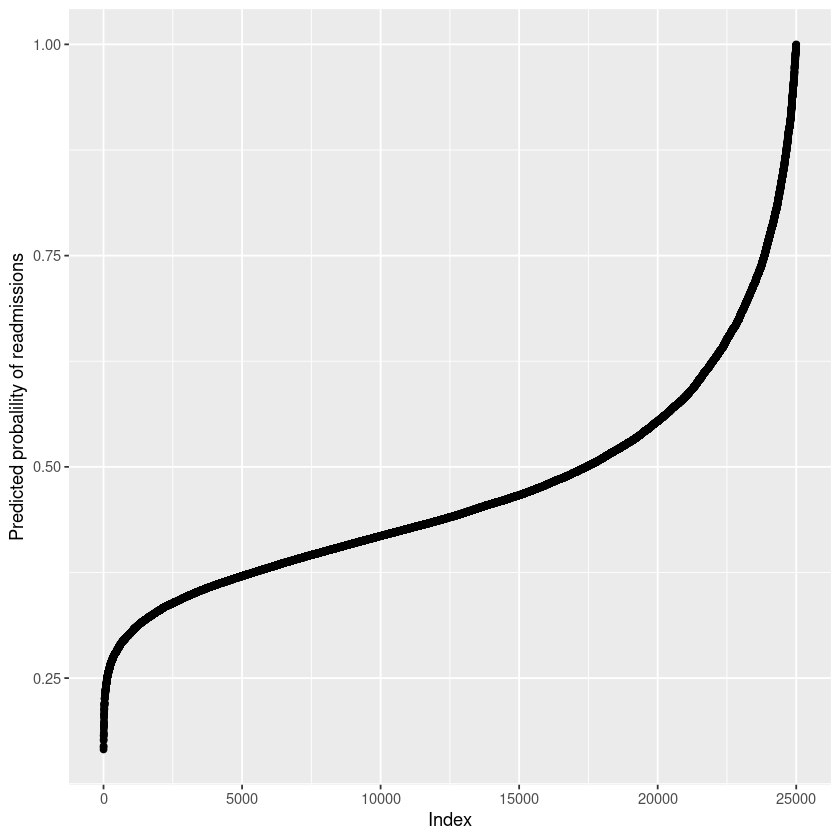

In [37]:
#then we plot our pretty graph on a chart
ggplot(data = predicted_df, aes(rank, probability_of_readmission)) +
  geom_point()+
  xlab ("Index") +
  ylab ("Predicted probalility of readmissions")

Yeah, i know the plot looks very funny and strange, quiet different from the expected "S-shaped" graph of logistic regression. But does the shape really matter? Nah, it's the accuracy that matters most.

Let's check that out in our confusion matrix.

In [38]:
#install the yardstick package where the confusion matrix is
install.packages("yardstick")
library(yardstick)

Installing yardstick [1.1.0] ...
	OK [linked cache]


In [39]:
# Get the actual responses from dataset
actual_response <- predicted_df$readmitted

# Get the predicted responses from the model
predicted_response <- round(predicted_df$probability_of_readmission)

# Get a table of these values
outcomes <- table(predicted_response, actual_response)

# Convert the table to a conf_mat object
confusion <- conf_mat(outcomes)
confusion

# Get summary metrics
summary(confusion, event_level = "second")

                  actual_response
predicted_response     0     1
                 0 10490  6939
                 1  2756  4815

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6122000
kap,binary,0.2057079
sens,binary,0.4096478
spec,binary,0.7919372
ppv,binary,0.6359794
npv,binary,0.6018704
mcc,binary,0.2189679
j_index,binary,0.2015850
bal_accuracy,binary,0.6007925


### Okay, what am i looking at?

You are looking at the summary of your model and the accuracy of your prediction. That is, what actualy happened (actual response) and what you said will happen (predicted response). 

In the summary, only 3 things are important, **the accuracy, sensitivity and specificity.** The **accuracy** is **61.2%**, this is the percentage of the total correct predictions about the probability of readmissions. Second is **sensitivity**, which is **41%**, this is the proportion of true positives, that is out of the total number of people that were readmitted, we were able to correctly predict just 41% of them. Last is the **specificity**, which is the proportion of true negatives. The specificity is **79%**. This means that out of the total number of people that were **not** readmitted, we were able to correctly predict 79% of them. 

## In conclusion:

1. The most common diagnosis across all age groups are Circulatory and Respiratory diagnosis.
2. Diabetes plays a important role in the readmission rates. People with the first and second diagnosis of diabetes are highly likely to be readmitted.
3. Some other factors that could affect or influence readmission rates like number of procedures, use of diabetes medication, number of emergency, time in hospital, etc., are included in the model that I used to predict readmission rates.
4. With an accuracy of 61%, more accurate methods of analysis can be carried out to increase the accuracy of the predictions. 